# One-Zone Model Degeneracies

Looking for degeneracies between Ia DTD and other parameters in the one-zone model outputs.

Preamble

In [1]:
from pathlib import Path
import math as m
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import vice

# Evolution functions
from dtd import Bimodal, PowerLaw, BrokenPowerLaw
from dtd import Exponential as ExponentialDTD
from dtd import test_plot as plot_dtd
from sfh import InsideOut, LateBurst, Constant
from sfh import Exponential as ExponentialSFH
from sfh import test_plot as plot_sfh

# VICE yields
from vice.yields.presets import JW20
vice.yields.ccsne.settings['fe'] = 0.0012 * 10**0.07

# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (4, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
})

# Plot styles
COLORS = {
    'powerlaw': 'black',
    'powerlaw_broken': 'orange',
    'exponential': 'blue',
    'exponential_long': 'green',
    'bimodal': 'red'
}
LINESTYLES = {
    'insideout': '-',
    'lateburst': '--',
    'exponential': ':',
    'constant': '-.',
}

# Simulation time
TMAX = 13.2 # Gyr
DT = 0.005 # Gyr
simtime = np.arange(0, TMAX+DT, DT) # Gyr

# Minimum Ia delay time
DELAY = 0.04 # Gyr

# Stellar mass of Milky Way (Licquia & Newman 2015, ApJ, 806, 96)
M_STAR_MW = 5.17e10

# Default one-zone model parameters
params = dict(
    elements=('fe', 'o', 'mg'),
    delay=DELAY,
    mode='sfr',
    dt=DT,
    eta=2.15,
)

Define star formation histories

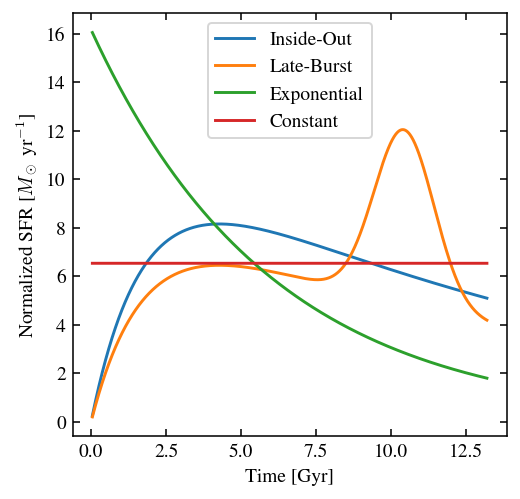

In [2]:
insideout = InsideOut()
lateburst = LateBurst()
exp_sfh = ExponentialSFH()
const_sfh = Constant()

plot_sfh()

Define SN Ia delay-time distributions

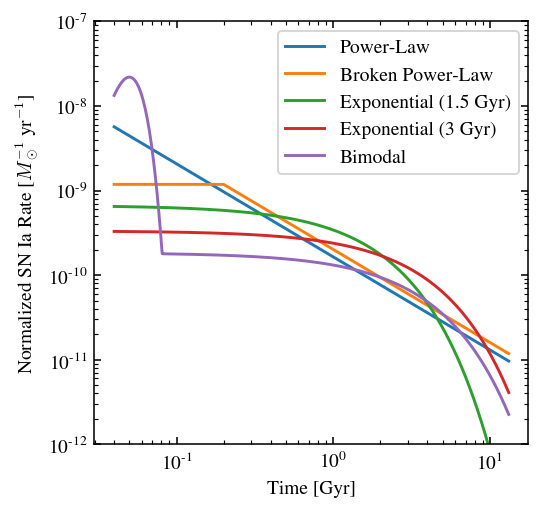

In [3]:
plaw_dtd = PowerLaw()
broken_dtd = BrokenPowerLaw()
exp_dtd = ExponentialDTD()
exp_dtd_long = ExponentialDTD(timescale=3)
bi_dtd = Bimodal()

plot_dtd()

Run models

In [4]:
params['elements'] = ('fe', 'o', 'mg')
sz = vice.singlezone(name='outputs/constant/powerlaw', func=const_sfh, RIa=plaw_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/constant/powerlaw_broken', func=const_sfh, RIa=broken_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/constant/exponential', func=const_sfh, RIa=exp_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/constant/exponential_long', func=const_sfh, RIa=exp_dtd_long, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/constant/bimodal', func=const_sfh, RIa=bi_dtd, **params)
sz.run(simtime, overwrite=True)

sz = vice.singlezone(name='outputs/insideout/powerlaw', func=insideout, RIa=plaw_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/insideout/powerlaw_broken', func=insideout, RIa=broken_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/insideout/exponential', func=insideout, RIa=exp_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/insideout/exponential_long', func=insideout, RIa=exp_dtd_long, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/insideout/bimodal', func=insideout, RIa=bi_dtd, **params)
sz.run(simtime, overwrite=True)

sz = vice.singlezone(name='outputs/lateburst/powerlaw', func=lateburst, RIa=plaw_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/lateburst/powerlaw_broken', func=lateburst, RIa=broken_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/lateburst/exponential', func=lateburst, RIa=exp_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/lateburst/exponential_long', func=lateburst, RIa=exp_dtd_long, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/lateburst/bimodal', func=lateburst, RIa=bi_dtd, **params)
sz.run(simtime, overwrite=True)

sz = vice.singlezone(name='outputs/exponential/powerlaw', func=exp_sfh, RIa=plaw_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/exponential/powerlaw_broken', func=exp_sfh, RIa=broken_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/exponential/exponential', func=exp_sfh, RIa=exp_dtd, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/exponential/exponential_long', func=exp_sfh, RIa=exp_dtd_long, **params)
sz.run(simtime, overwrite=True)
sz = vice.singlezone(name='outputs/exponential/bimodal', func=exp_sfh, RIa=bi_dtd, **params)
sz.run(simtime, overwrite=True)

Plotting helper functions

In [5]:
def tri_plot(tlim=(-1, 14), felim=(-2, 0.5), olim=(-0.3, 0.5)):
    """Format triple-panel plot of metallicity and alpha abundance."""
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # First panel: metallicity vs time
    ax = axs[0]
    ax.set_xlim(tlim)
    ax.set_ylim(felim)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_xlabel('Time [Gyr]')
    ax.set_ylabel('[Fe/H]')

    # Second panel: alpha vs time
    ax = axs[1]
    ax.set_xlim(tlim)
    ax.set_ylim(olim)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.set_xlabel('Time [Gyr]')
    ax.set_ylabel('[O/Fe]')

    # Third panel: alpha vs fe
    ax = axs[2]
    ax.set_xlim(felim)
    ax.set_ylim(olim)
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.set_xlabel('[Fe/H]')
    ax.set_ylabel('[O/Fe]')
    
    return fig, axs


def quad_plot(tlim=(-1, 14), felim=(-2, 0.5), ofelim=(-0.3, 0.5), ohlim=(-2, 0.5)):
    """Format triple-panel plot of metallicity and alpha abundance."""
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    
    # First panel: [Fe/O] vs [O/H]
    ax = axs[0,0]
    ax.set_xlim(ohlim)
    ax.set_ylim((-ofelim[1], -ofelim[0]))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.set_xlabel('[O/H]')
    ax.set_ylabel('[Fe/O]')
    
    # Second panel: [O/Fe] vs [Fe/H]
    ax = axs[0,1]
    ax.set_xlim(felim)
    ax.set_ylim(ofelim)
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.set_xlabel('[Fe/H]')
    ax.set_ylabel('[O/Fe]')

    # Third panel: [Fe/H] vs time
    ax = axs[1,0]
    ax.set_xlim(tlim)
    ax.set_ylim(felim)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_xlabel('Time [Gyr]')
    ax.set_ylabel('[Fe/H]')

    # Fourth panel: [O/Fe] vs time
    ax = axs[1,1]
    ax.set_xlim(tlim)
    ax.set_ylim(ofelim)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.set_xlabel('Time [Gyr]')
    ax.set_ylabel('[O/Fe]')
    
    return fig, axs

In [6]:
def tri_mdf(felim1=(-2.5, 0.5), felim2=(-1, 0.25), ylim2=(1e-2, 20), olim=(-0.2, 0.5), logy=True):
    """Format triple-panel plot of metallicity and oxygen distribution functions."""
    
    fig, axs = plt.subplots(1, 3, figsize=(12,4))

    # First panel: [Fe/H] distribution function
    ax = axs[0]
    ax.set_xlabel('[Fe/H]')
    ax.set_xlim(felim1)
    ax.set_ylabel('dN/d[Fe/H]')
    ax.set_yscale('log')
    
    # Second panel: zoom in near peak of first panel MDF
    ax = axs[1]
    ax.set_xlabel('[Fe/H]')
    ax.set_xlim(felim2)
    if logy:
        ax.set_yscale('log')
    ax.set_ylim(ylim2)
    ax.set_ylabel('dN/d[Fe/H]')
    
    # Third panel: [O/Fe] distribution function
    ax = axs[2]
    ax.set_xlabel('[O/Fe]')
    ax.set_xlim(olim)
    ax.set_ylabel('dN/d[O/Fe]')
    if logy:
        ax.set_yscale('log')

    return fig, axs

def plot_mdf(runs, title='', legend_labels=[], **kwargs):
    """Generate complete plot of MDF and ODF for given one-zone runs."""
    
    fig, axs = tri_mdf(**kwargs)
    
    for run in runs:
        mdf = vice.mdf(os.path.join('outputs', run))
        bins = mdf['bin_edge_left'] + mdf['bin_edge_right'][-1:]
        sfh = run.split(os.sep)[0]
        dtd = run.split(os.sep)[1]
        c = COLORS[dtd]
        ls = LINESTYLES[sfh]
        axs[0].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls, label=run)
        axs[1].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls)
        axs[2].hist(bins[:-1], bins, weights=mdf['dn/d[o/fe]'], histtype='step', color=c, linestyle=ls)
    
    handles, labels = axs[0].get_legend_handles_labels()
    if len(legend_labels) == len(labels):
        labels = legend_labels
    fig.legend(handles, labels)
    
    fig.suptitle(title)
    plt.show()

In [7]:
def get_ofe_drop(name, delta_ofe=0.1):
    """Returns the metallicity at which [O/Fe] drops 0.1 dex below the plateau."""
    
    history = vice.history(name)
    feh = history['[fe/h]']
    ofe = history['[o/fe]']
    plateau = ofe[1]
    drop = [f for i, f in enumerate(feh) if ofe[i] < plateau - delta_ofe][0]
    return drop

get_ofe_drop('outputs/insideout/powerlaw')

-0.9365523454247441

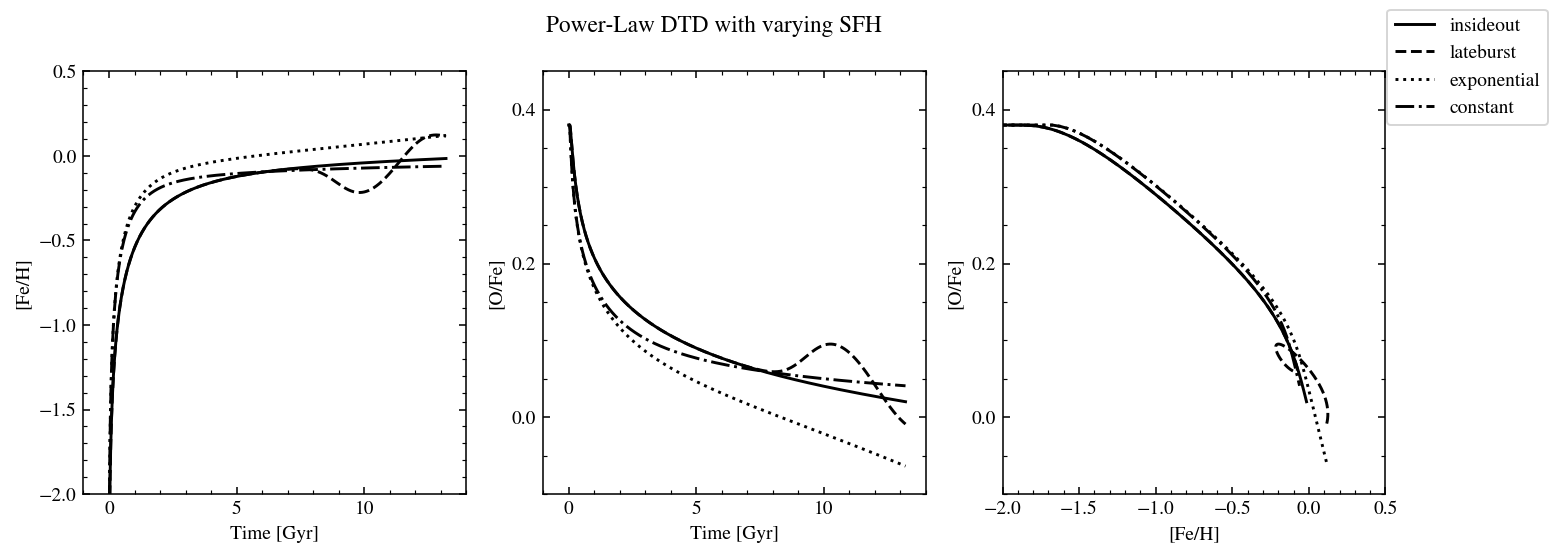

In [8]:
# Different SFHs with same DTD
fig, axs = tri_plot(olim=(-0.1, 0.45))
sfhs = ['insideout', 'lateburst', 'exponential', 'constant']
styles = ['-', '--', ':', '-.']
dtd = 'powerlaw'
c = 'k'
for sfh, ls in zip(sfhs, styles):
    history = vice.history(os.path.join('outputs', sfh, dtd))
    axs[0].plot(history['time'], history['[fe/h]'], color=c, linestyle=ls, label=sfh)
    axs[1].plot(history['time'], history['[o/fe]'], color=c, linestyle=ls)
    axs[2].plot(history['[fe/h]'], history['[o/fe]'], color=c, linestyle=ls)
fig.legend()
fig.suptitle('Power-Law DTD with varying SFH')
plt.show()

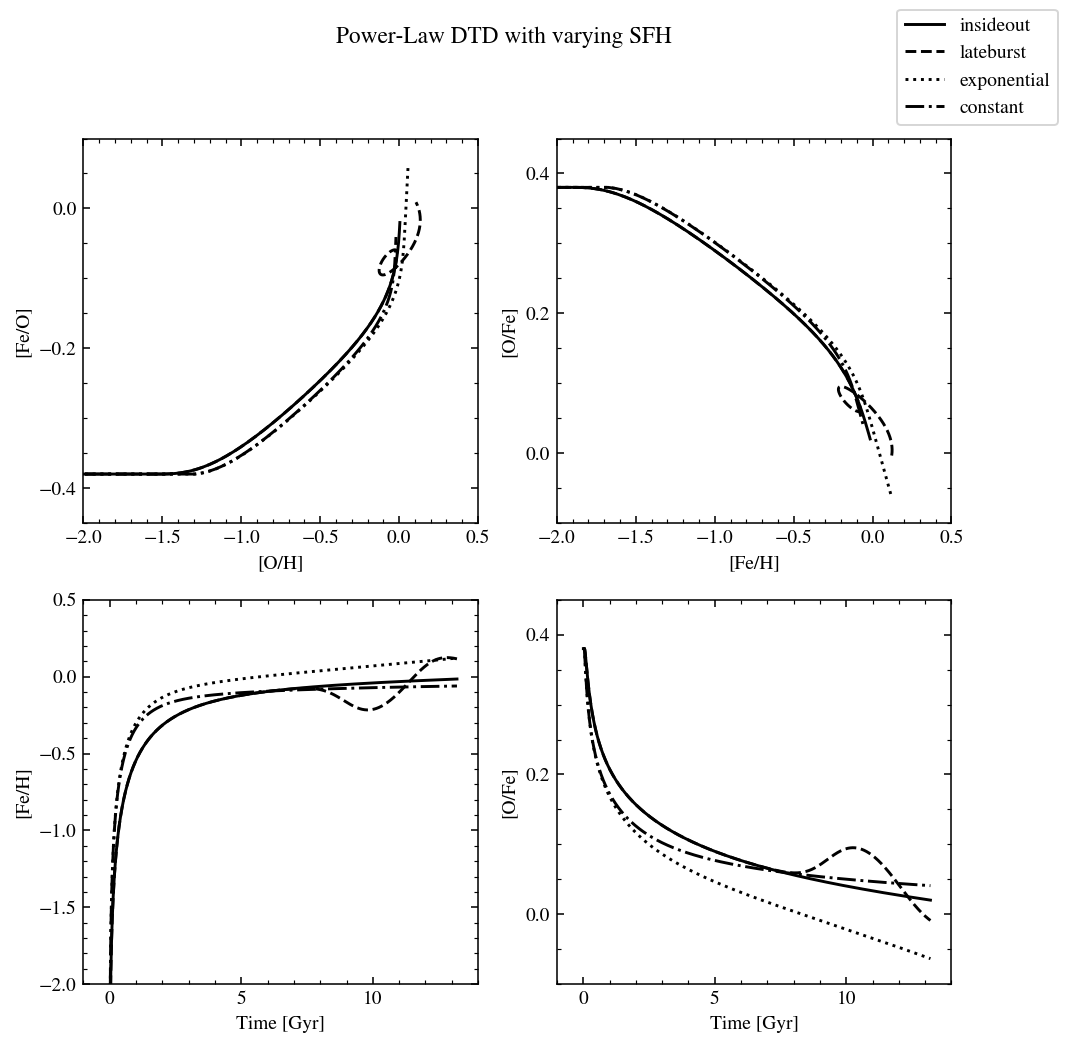

In [9]:
# Different SFHs with same DTD
fig, axs = quad_plot(ofelim=(-0.1, 0.45))
sfhs = ['insideout', 'lateburst', 'exponential', 'constant']
styles = ['-', '--', ':', '-.']
dtd = 'powerlaw'
c = 'k'
for sfh, ls in zip(sfhs, styles):
    history = vice.history(os.path.join('outputs', sfh, dtd))
    axs[0,0].plot(history['[o/h]'], history['[fe/o]'], color=c, linestyle=ls, label=sfh)
    axs[0,1].plot(history['[fe/h]'], history['[o/fe]'], color=c, linestyle=ls)
    axs[1,0].plot(history['time'], history['[fe/h]'], color=c, linestyle=ls)
    axs[1,1].plot(history['time'], history['[o/fe]'], color=c, linestyle=ls)
fig.legend()
fig.suptitle('Power-Law DTD with varying SFH')
plt.show()

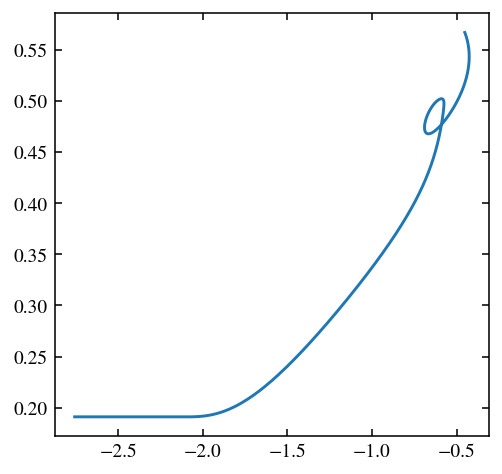

In [10]:
fig, ax = plt.subplots()
history = vice.history('outputs/lateburst/powerlaw')
ax.plot(history['[mg/h]'], history['[fe/mg]'])
plt.show()

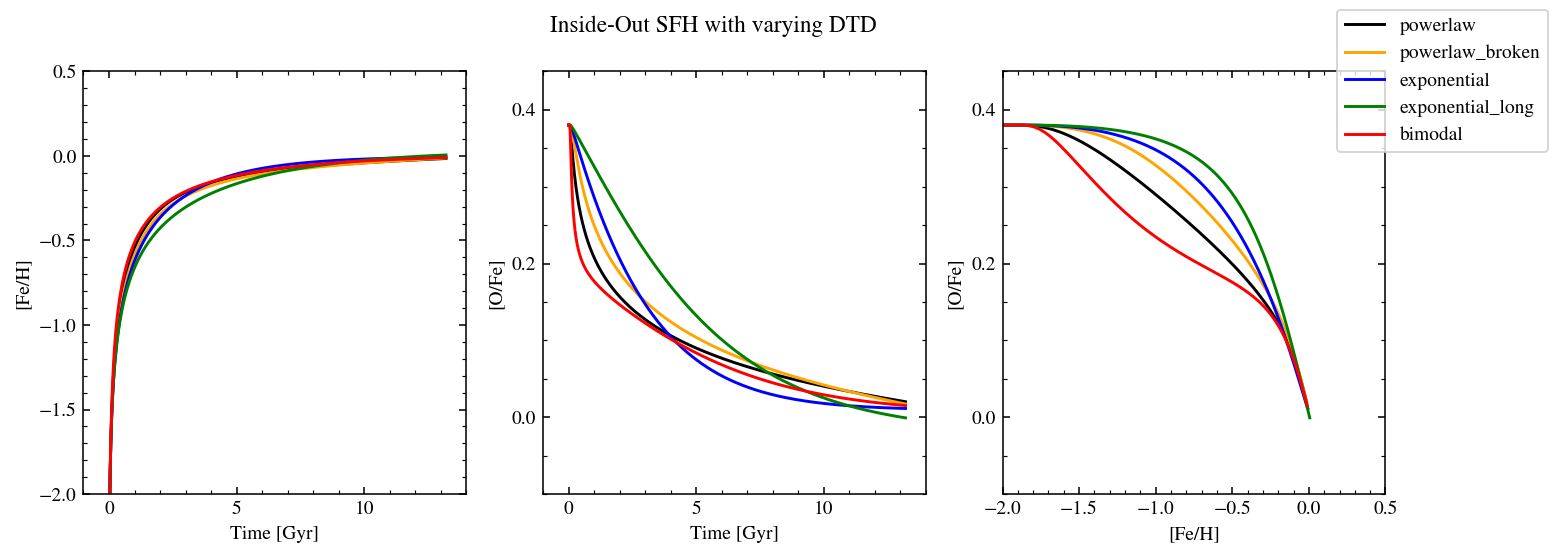

In [11]:
# Different DTDs with same SFH
fig, axs = tri_plot(olim=(-0.1, 0.45))
dtds = ['powerlaw', 'powerlaw_broken', 'exponential', 'exponential_long', 'bimodal']
sfh = 'insideout'
ls = '-'
for dtd in dtds:
    history = vice.history(str(os.path.join('outputs', sfh, dtd)))
    c = COLORS[dtd]
    axs[0].plot(history['time'], history['[fe/h]'], color=c, linestyle=ls, label=dtd)
    axs[1].plot(history['time'], history['[o/fe]'], color=c, linestyle=ls)
    axs[2].plot(history['[fe/h]'], history['[o/fe]'], color=c, linestyle=ls)
fig.legend()
fig.suptitle('Inside-Out SFH with varying DTD')
plt.show()

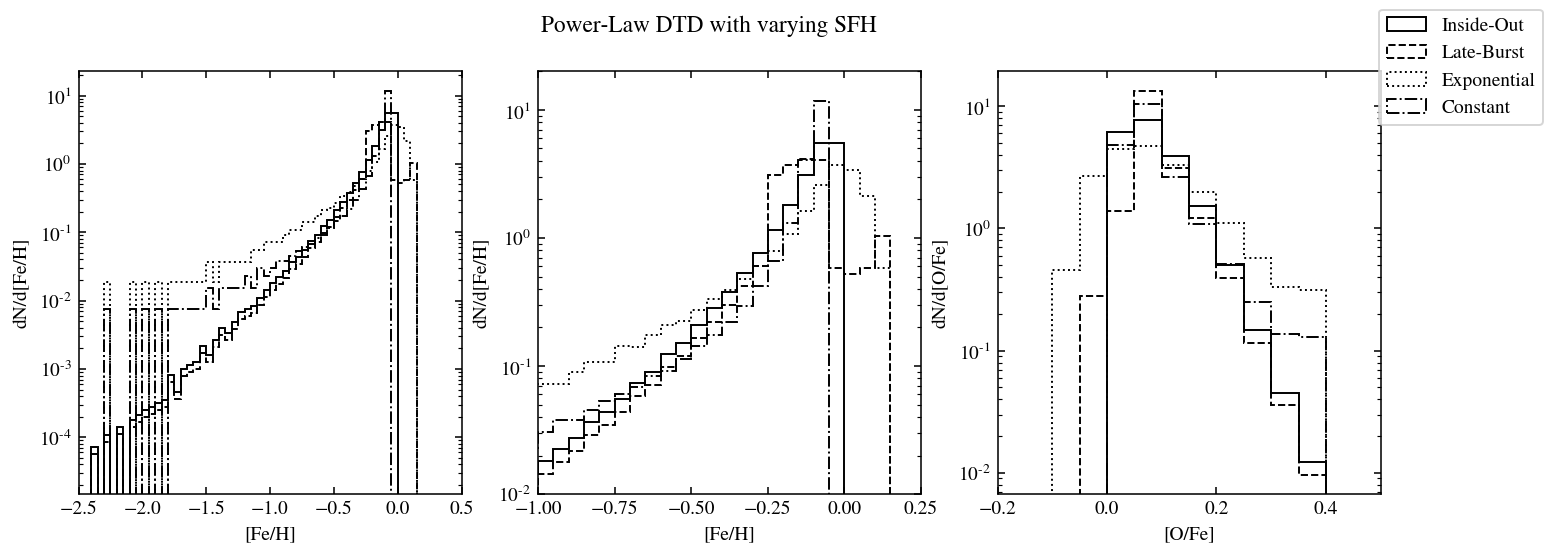

In [12]:
# MDFs
sfhs = ['insideout', 'lateburst', 'exponential', 'constant']
dtd = 'powerlaw'
runs = [os.path.join(sfh, dtd) for sfh in sfhs]
plot_mdf(runs, title='Power-Law DTD with varying SFH', 
         legend_labels=['Inside-Out', 'Late-Burst', 'Exponential', 'Constant'])

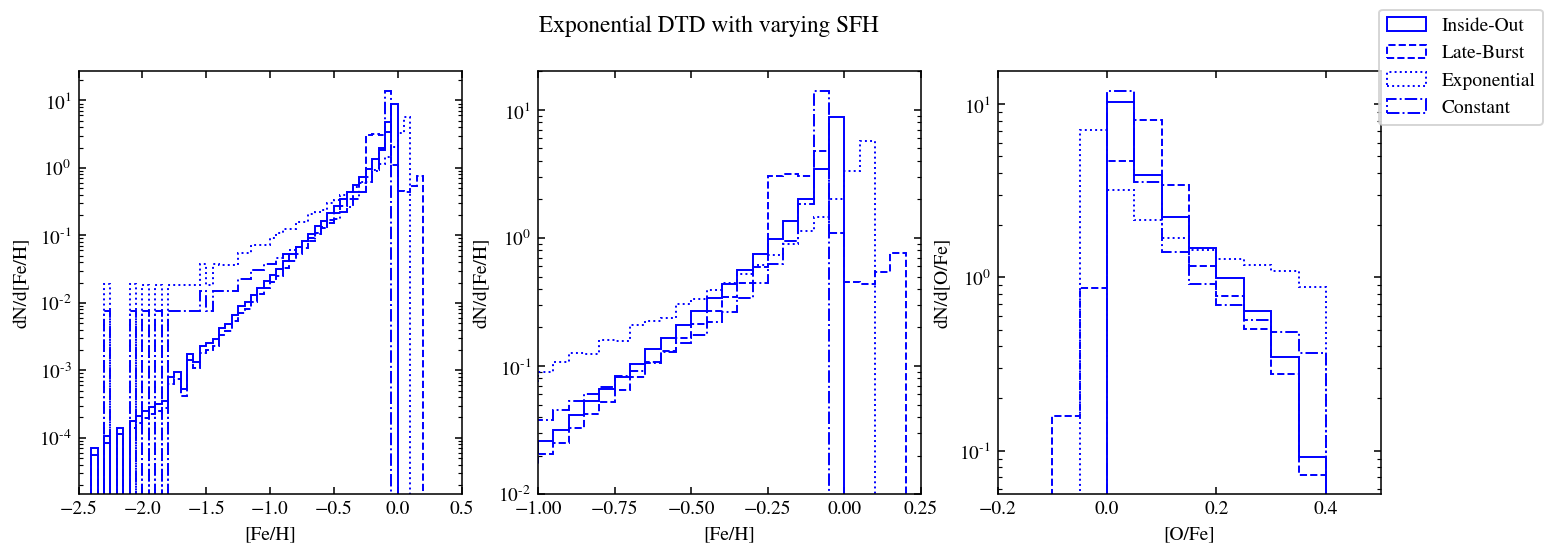

In [13]:
# MDFs
sfhs = ['insideout', 'lateburst', 'exponential', 'constant']
dtd = 'exponential'
runs = [os.path.join(sfh, dtd) for sfh in sfhs]
plot_mdf(runs, title='Exponential DTD with varying SFH', 
         legend_labels=['Inside-Out', 'Late-Burst', 'Exponential', 'Constant'])

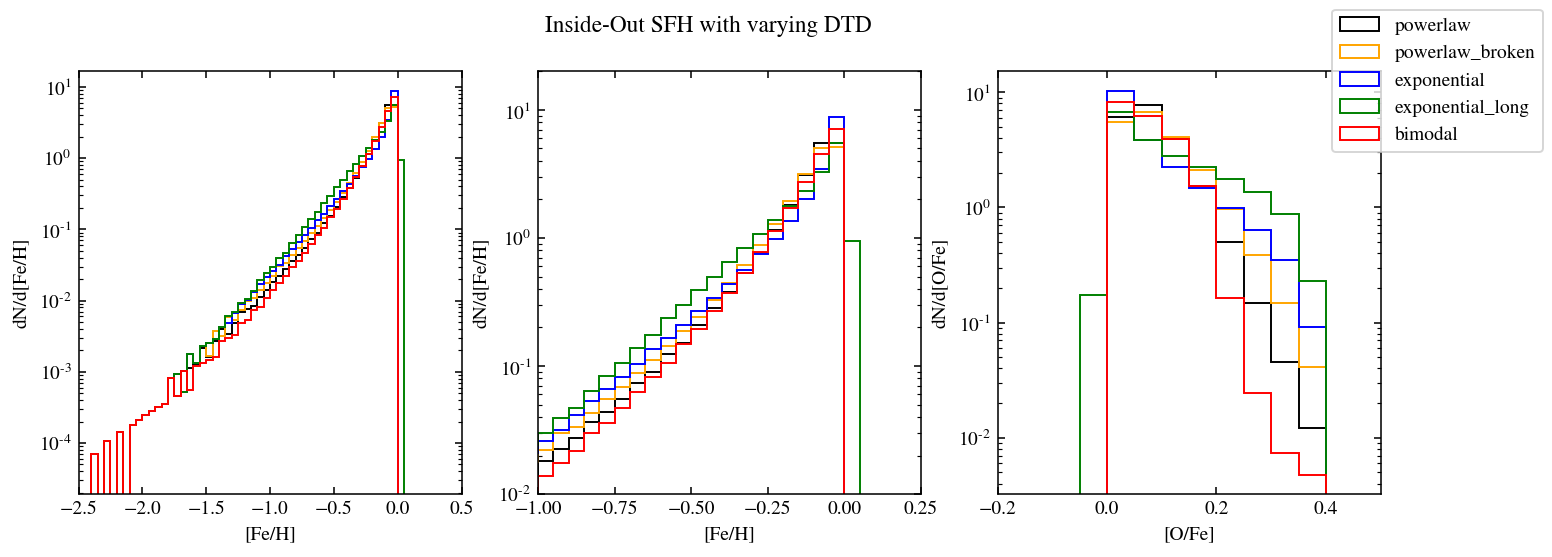

In [14]:
fig, axs = tri_mdf()
dtds = ['powerlaw', 'powerlaw_broken', 'exponential', 'exponential_long', 'bimodal']
sfh = 'insideout'
ls = '-'
for dtd in dtds:
    mdf = vice.mdf(str(os.path.join('outputs', sfh, dtd)))
    bins = mdf['bin_edge_left'] + mdf['bin_edge_right'][-1:]
    c = COLORS[dtd]
    axs[0].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls, label=dtd)
    axs[1].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls)
    axs[2].hist(bins[:-1], bins, weights=mdf['dn/d[o/fe]'], histtype='step', color=c, linestyle=ls)

fig.legend()
fig.suptitle('Inside-Out SFH with varying DTD')
plt.show()

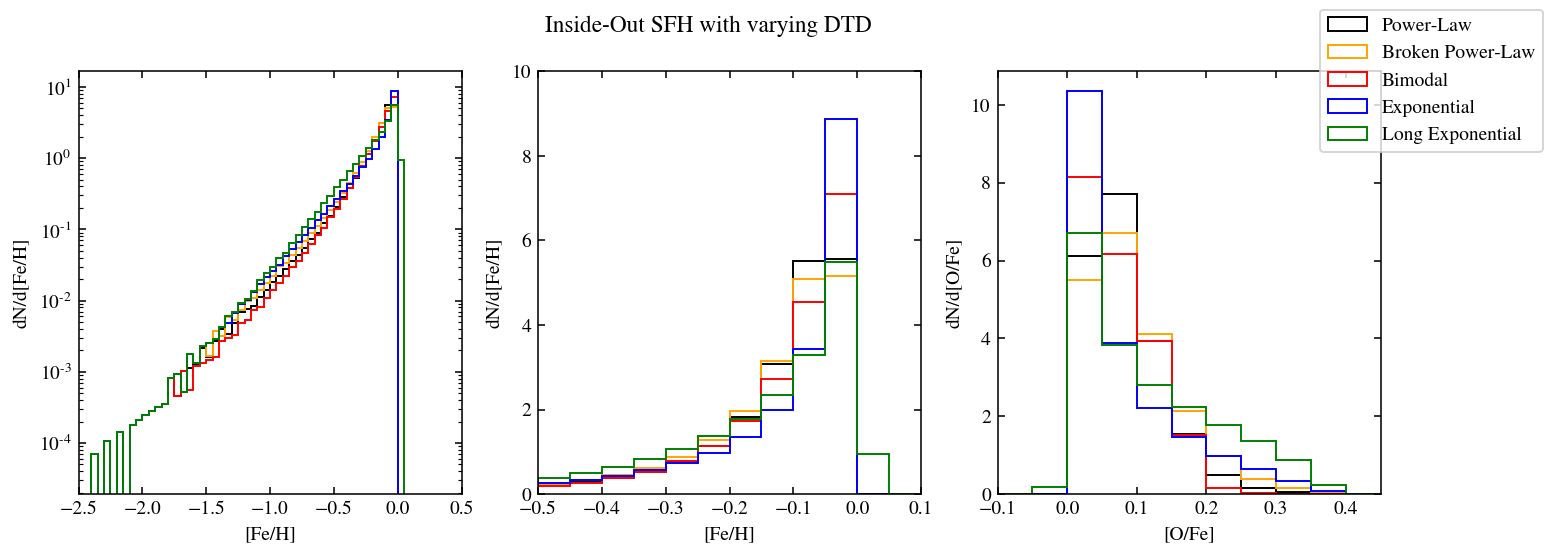

In [15]:
sfh = 'insideout'
dtds = ['powerlaw', 'powerlaw_broken', 'bimodal', 'exponential', 'exponential_long']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Inside-Out SFH with varying DTD', logy=False, ylim2=(0, 10), felim2=(-0.5, 0.1), olim=(-0.1, 0.45),
         legend_labels=['Power-Law', 'Broken Power-Law', 'Bimodal', 'Exponential', 'Long Exponential'])

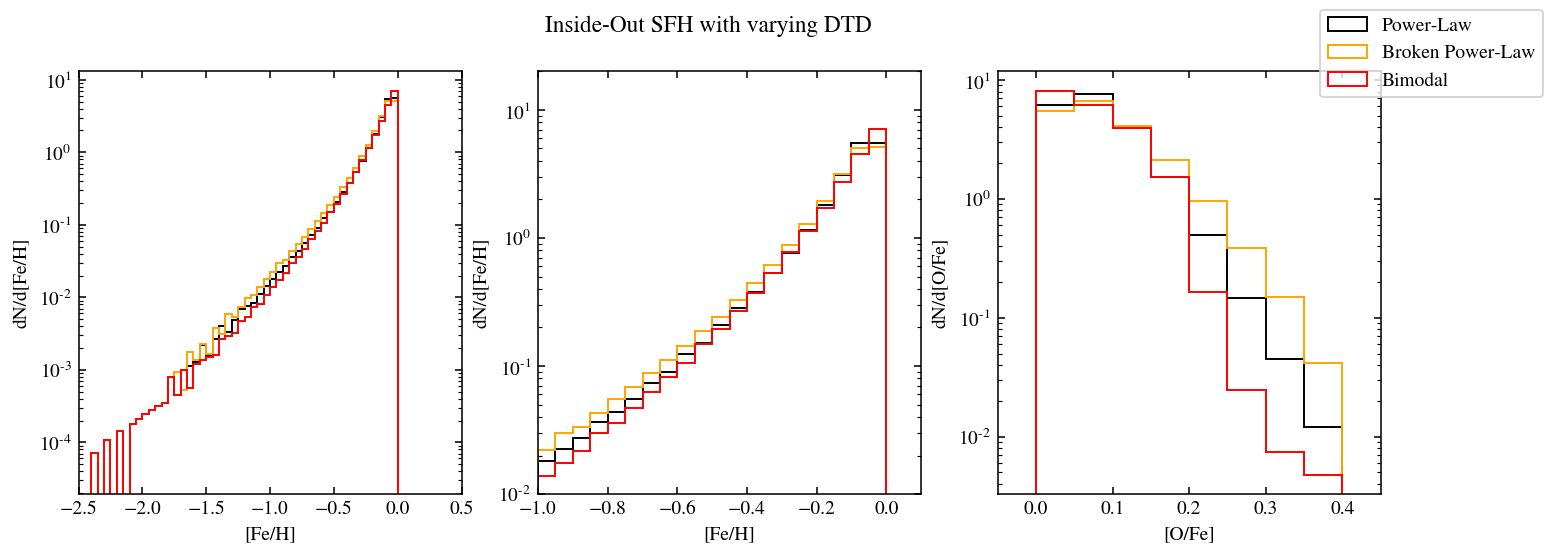

In [16]:
sfh = 'insideout'
dtds = ['powerlaw', 'powerlaw_broken', 'bimodal']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Inside-Out SFH with varying DTD', felim2=(-1, 0.1), olim=(-.05, .45),
         legend_labels=['Power-Law', 'Broken Power-Law', 'Bimodal'])

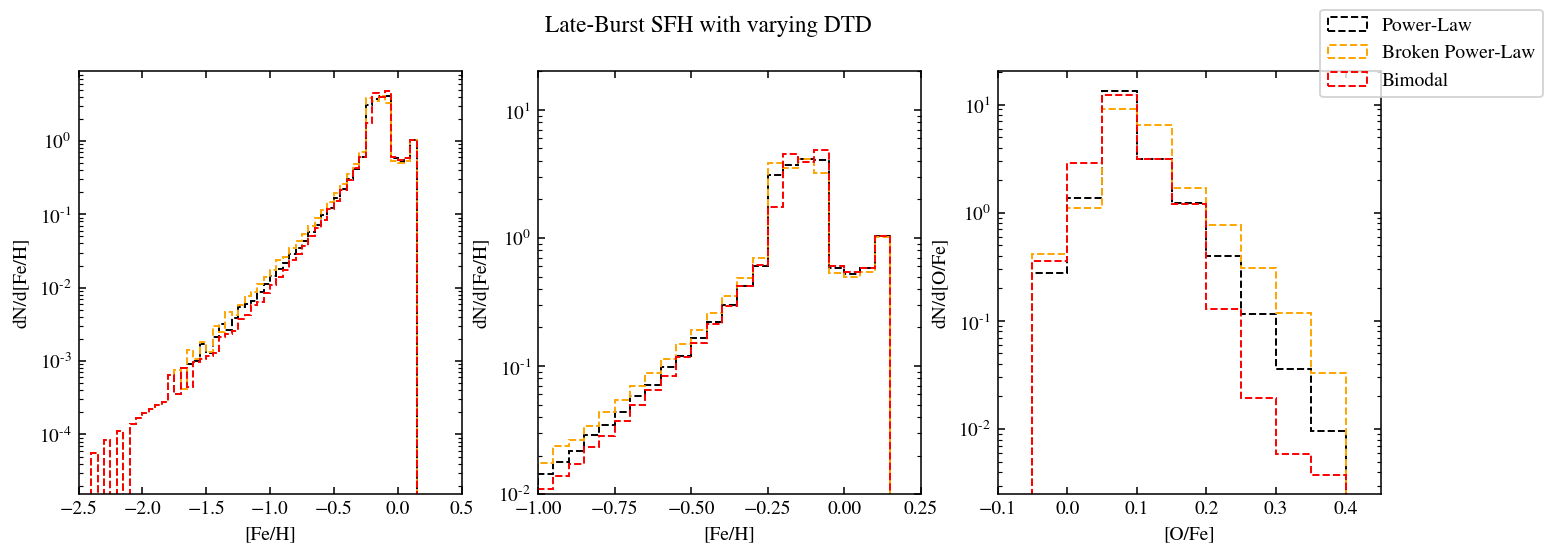

In [17]:
sfh = 'lateburst'
dtds = ['powerlaw', 'powerlaw_broken', 'bimodal']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Late-Burst SFH with varying DTD', olim=(-0.1, 0.45),
         legend_labels=['Power-Law', 'Broken Power-Law', 'Bimodal'])

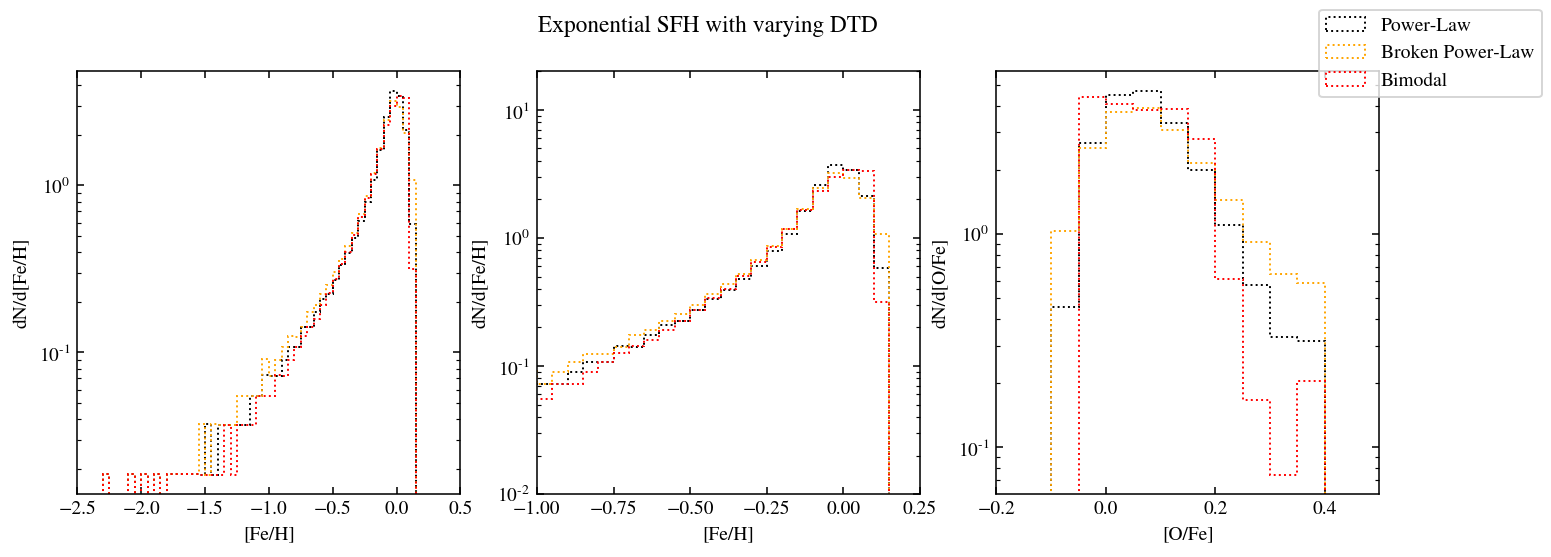

In [18]:
sfh = 'exponential'
dtds = ['powerlaw', 'powerlaw_broken', 'bimodal']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Exponential SFH with varying DTD', 
         legend_labels=['Power-Law', 'Broken Power-Law', 'Bimodal'])

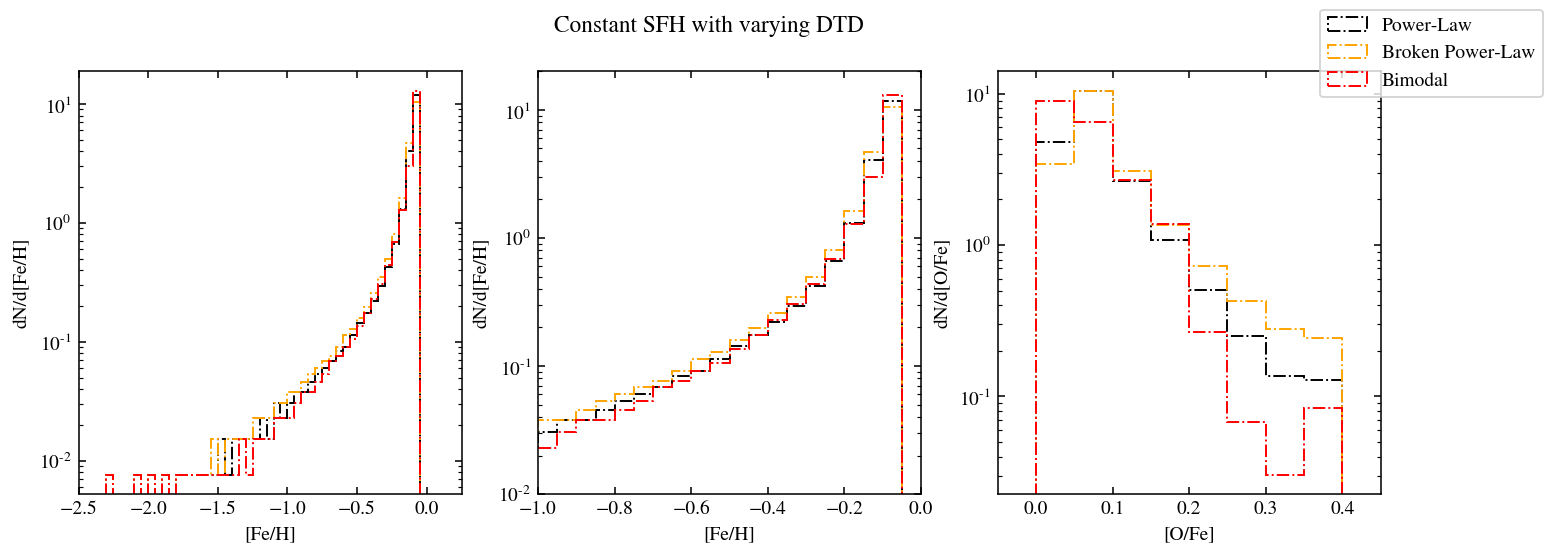

In [19]:
sfh = 'constant'
dtds = ['powerlaw', 'powerlaw_broken', 'bimodal']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Constant SFH with varying DTD', 
         legend_labels=['Power-Law', 'Broken Power-Law', 'Bimodal'],
         olim=(-.05, .45), felim1=(-2.5, 0.25), felim2=(-1,0))

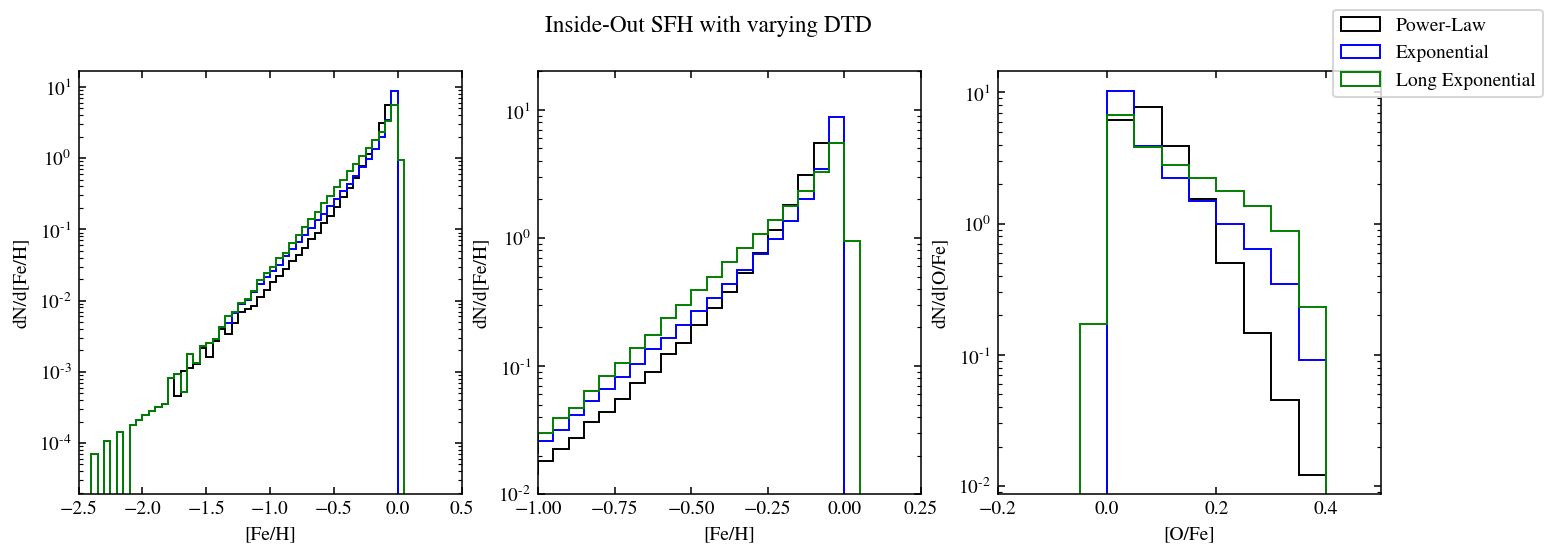

In [20]:
sfh = 'insideout'
dtds = ['powerlaw', 'exponential', 'exponential_long']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Inside-Out SFH with varying DTD',
         legend_labels=['Power-Law', 'Exponential', 'Long Exponential'])

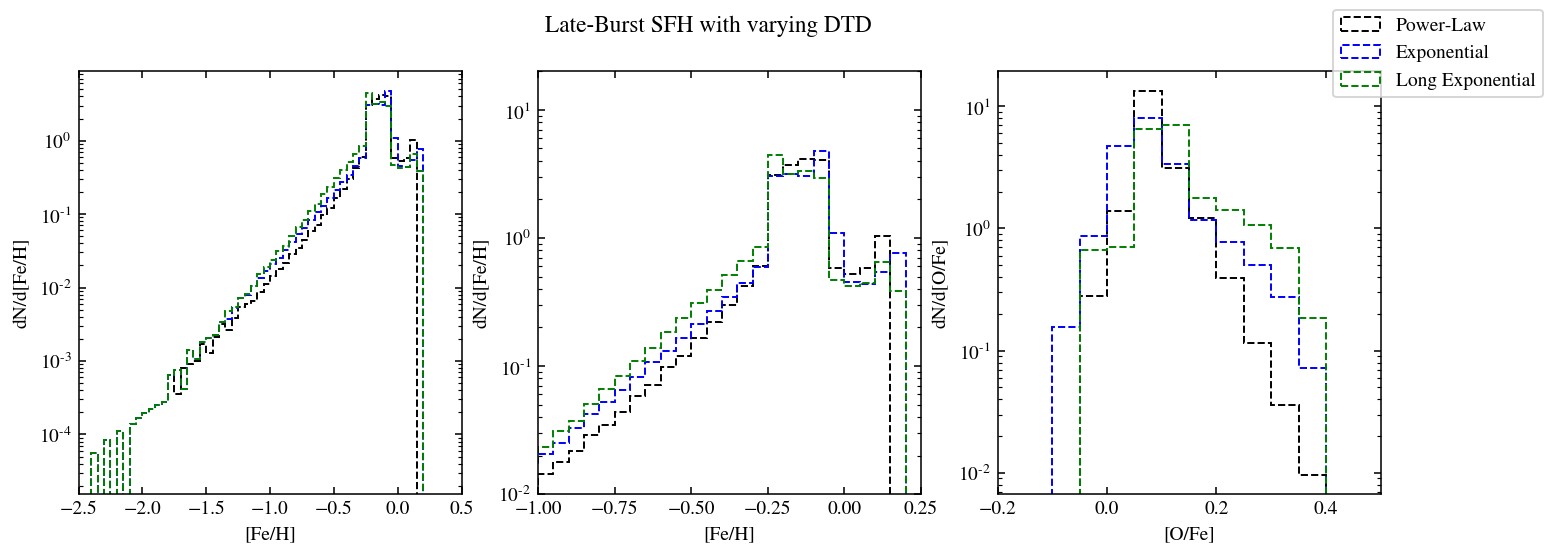

In [21]:
sfh = 'lateburst'
dtds = ['powerlaw', 'exponential', 'exponential_long']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Late-Burst SFH with varying DTD',
         legend_labels=['Power-Law', 'Exponential', 'Long Exponential'])

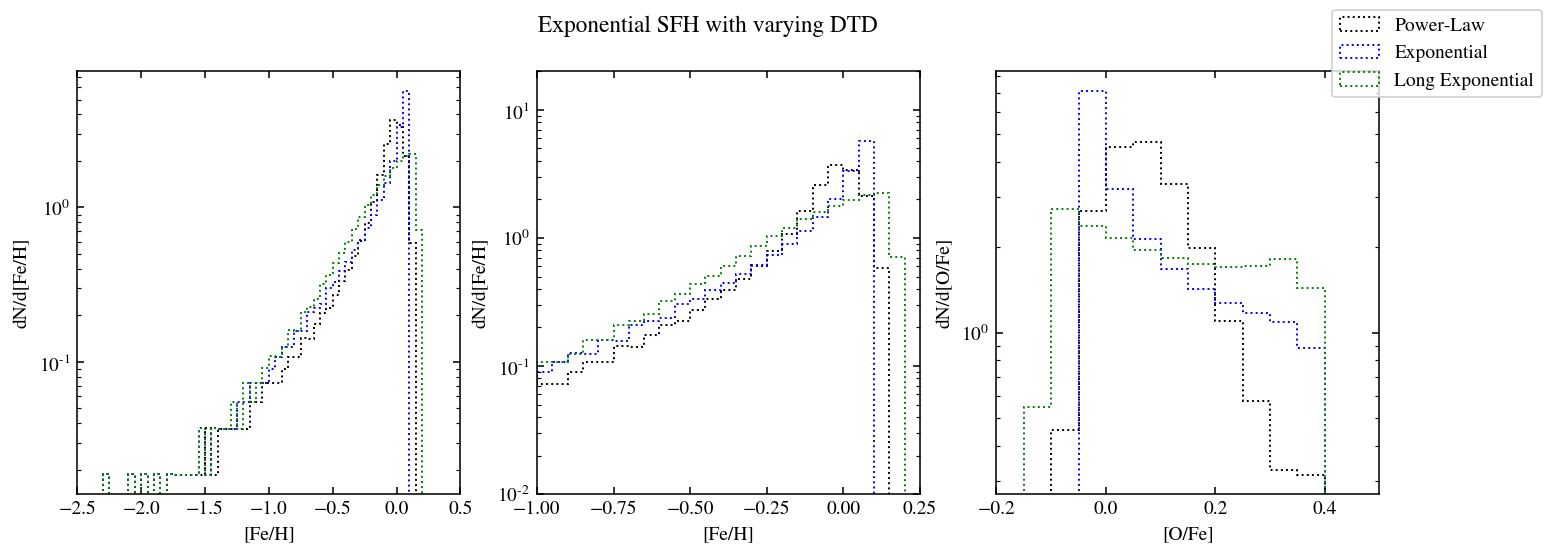

In [22]:
sfh = 'exponential'
dtds = ['powerlaw', 'exponential', 'exponential_long']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Exponential SFH with varying DTD',
         legend_labels=['Power-Law', 'Exponential', 'Long Exponential'])

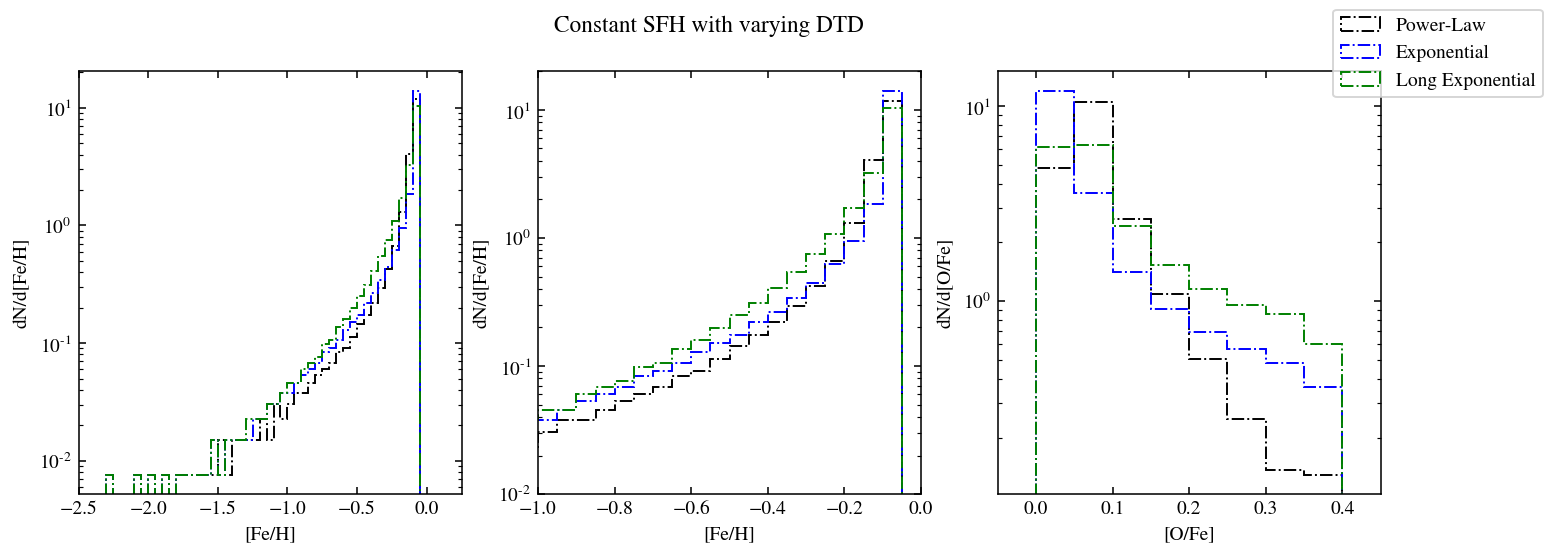

In [23]:
sfh = 'constant'
dtds = ['powerlaw', 'exponential', 'exponential_long']
runs = [os.path.join(sfh, dtd) for dtd in dtds]
plot_mdf(runs, title='Constant SFH with varying DTD', felim1=(-2.5, 0.25), felim2=(-1, 0), olim=(-0.05, 0.45),
         legend_labels=['Power-Law', 'Exponential', 'Long Exponential'])

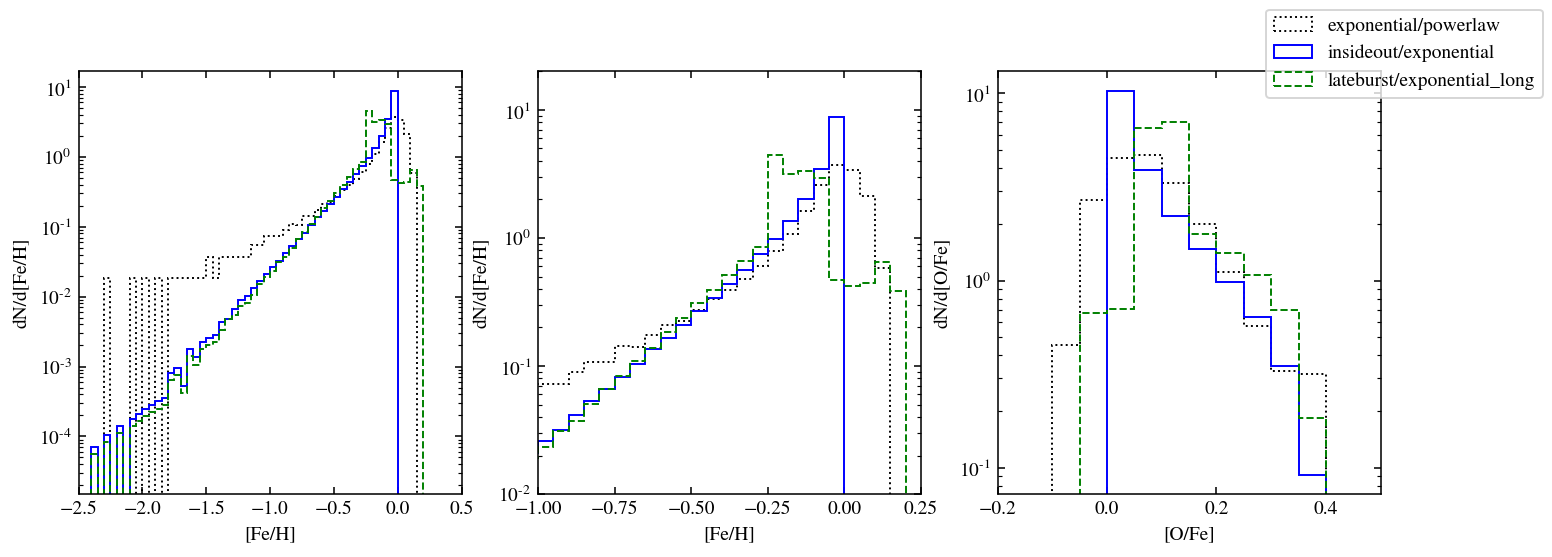

In [24]:
fig, axs = tri_mdf()
runs = ['exponential/powerlaw', 'insideout/exponential', 'lateburst/exponential_long']
for run in runs:
    mdf = vice.mdf('outputs/' + run)
    bins = mdf['bin_edge_left'] + mdf['bin_edge_right'][-1:]
    sfh = run.split('/')[0]
    dtd = run.split('/')[1]
    c = COLORS[dtd]
    ls = LINESTYLES[sfh]
    axs[0].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls, label=run)
    axs[1].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls)
    axs[2].hist(bins[:-1], bins, weights=mdf['dn/d[o/fe]'], histtype='step', color=c, linestyle=ls)

fig.legend()
plt.show()

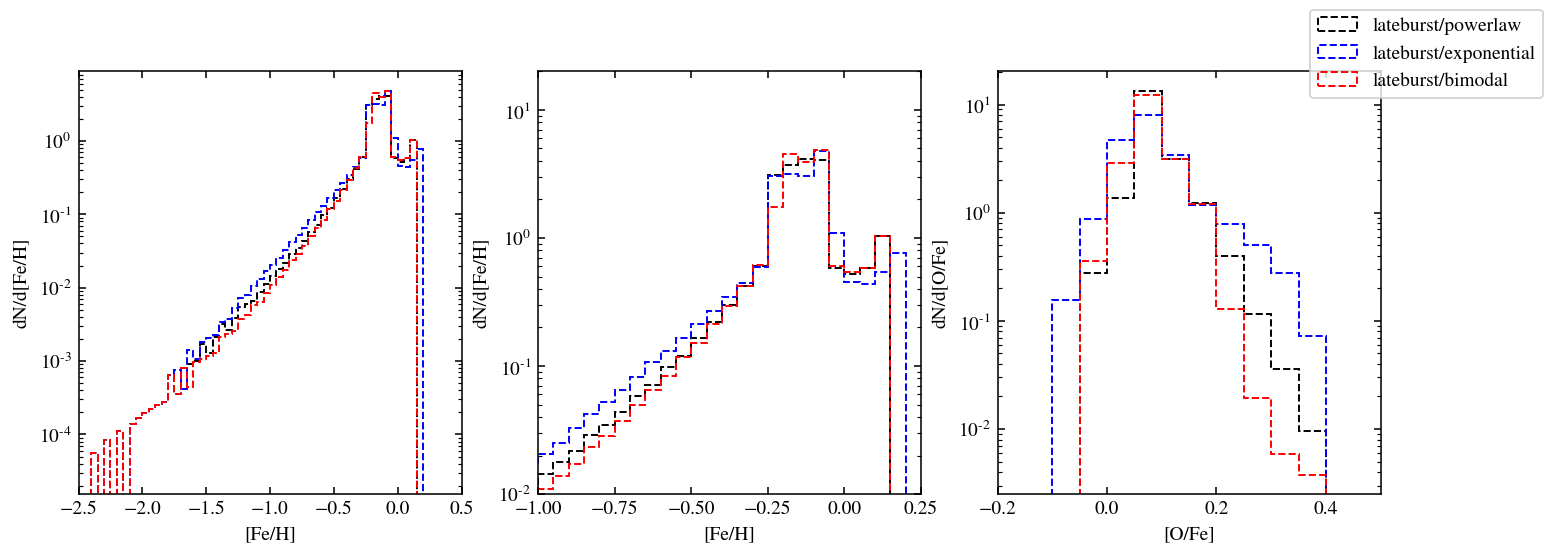

In [25]:
fig, axs = tri_mdf()
runs = ['lateburst/powerlaw', 'lateburst/exponential', 'lateburst/bimodal']
for run in runs:
    mdf = vice.mdf('outputs/' + run)
    bins = mdf['bin_edge_left'] + mdf['bin_edge_right'][-1:]
    sfh = run.split('/')[0]
    dtd = run.split('/')[1]
    c = COLORS[dtd]
    ls = LINESTYLES[sfh]
    axs[0].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls, label=run)
    axs[1].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls)
    axs[2].hist(bins[:-1], bins, weights=mdf['dn/d[o/fe]'], histtype='step', color=c, linestyle=ls)

fig.legend()
plt.show()

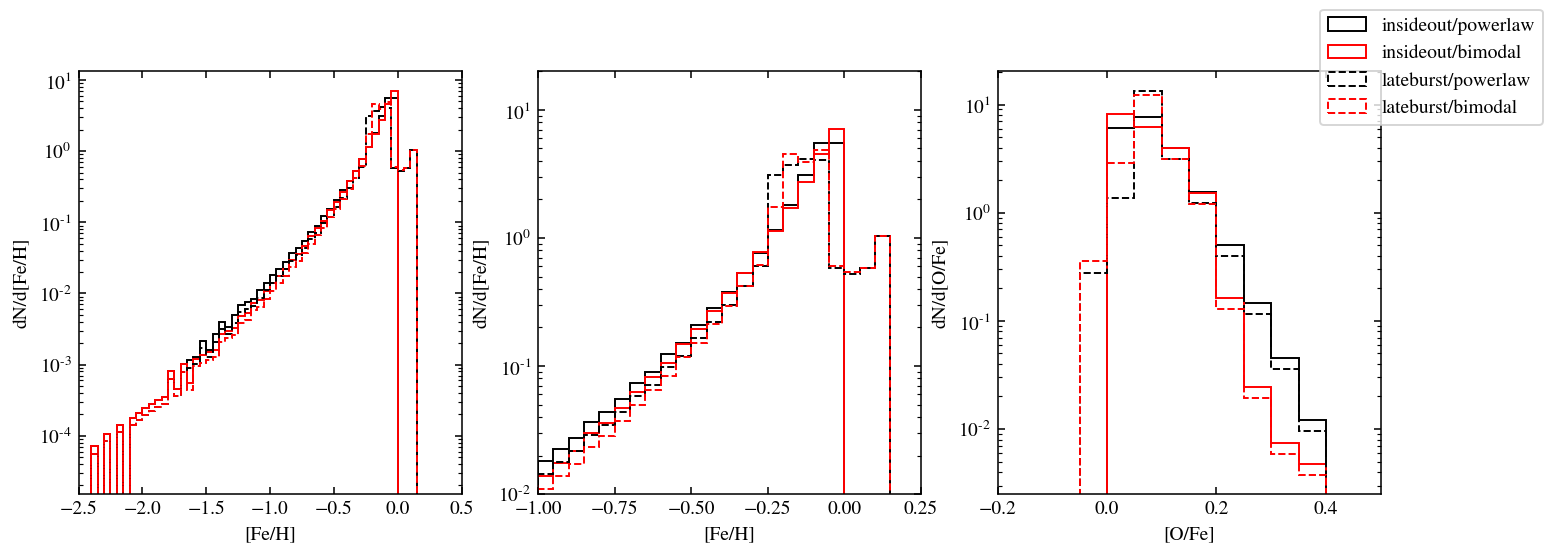

In [26]:
fig, axs = tri_mdf()
runs = ['insideout/powerlaw', 'insideout/bimodal', 'lateburst/powerlaw', 'lateburst/bimodal']
for run in runs:
    mdf = vice.mdf('outputs/' + run)
    bins = mdf['bin_edge_left'] + mdf['bin_edge_right'][-1:]
    sfh = run.split('/')[0]
    dtd = run.split('/')[1]
    c = COLORS[dtd]
    ls = LINESTYLES[sfh]
    axs[0].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls, label=run)
    axs[1].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls)
    axs[2].hist(bins[:-1], bins, weights=mdf['dn/d[o/fe]'], histtype='step', color=c, linestyle=ls)

fig.legend()
plt.show()

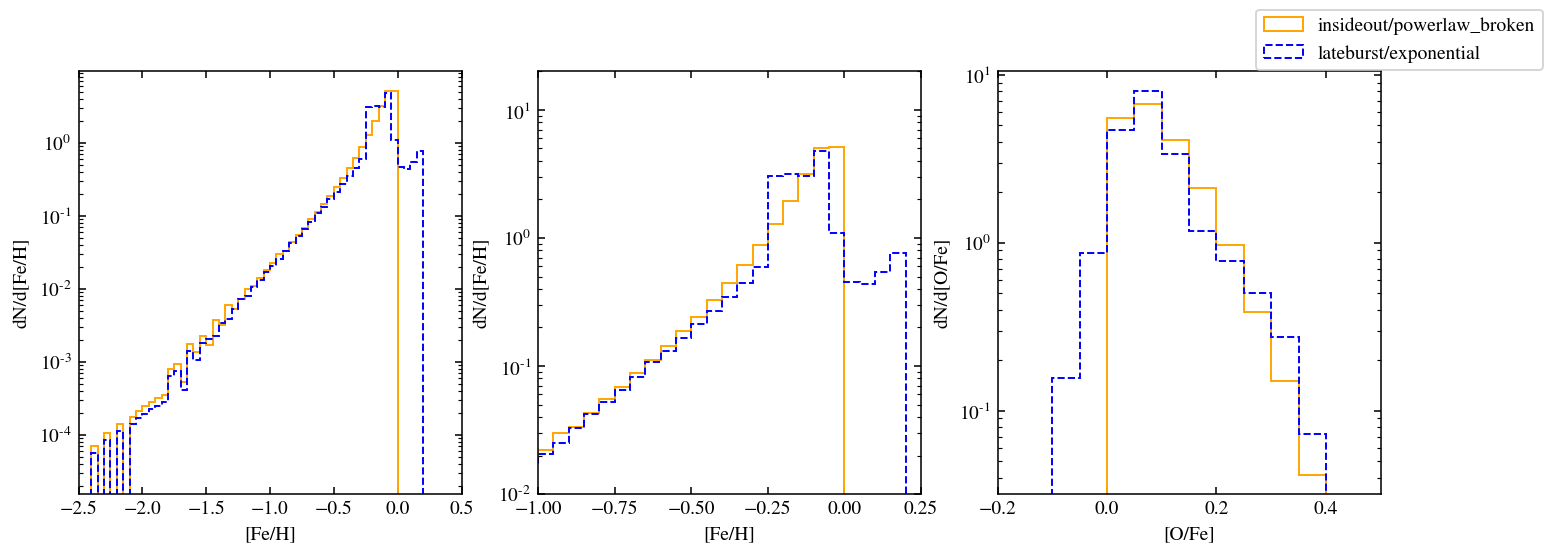

In [27]:
fig, axs = tri_mdf()
runs = ['insideout/powerlaw_broken', 'lateburst/exponential']
for run in runs:
    mdf = vice.mdf('outputs/' + run)
    bins = mdf['bin_edge_left'] + mdf['bin_edge_right'][-1:]
    sfh = run.split('/')[0]
    dtd = run.split('/')[1]
    c = COLORS[dtd]
    ls = LINESTYLES[sfh]
    axs[0].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls, label=run)
    axs[1].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls)
    axs[2].hist(bins[:-1], bins, weights=mdf['dn/d[o/fe]'], histtype='step', color=c, linestyle=ls)

fig.legend()
plt.show()

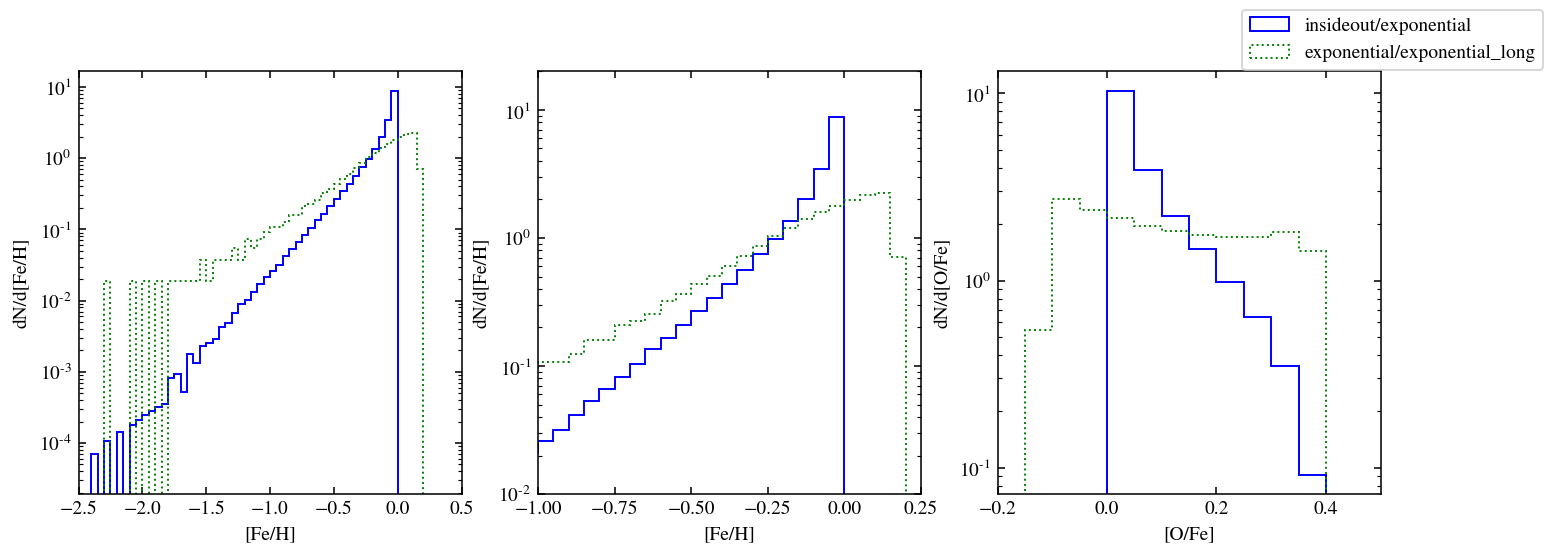

In [28]:
fig, axs = tri_mdf()
runs = ['insideout/exponential', 'exponential/exponential_long']
for run in runs:
    mdf = vice.mdf('outputs/' + run)
    bins = mdf['bin_edge_left'] + mdf['bin_edge_right'][-1:]
    sfh = run.split('/')[0]
    dtd = run.split('/')[1]
    c = COLORS[dtd]
    ls = LINESTYLES[sfh]
    axs[0].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls, label=run)
    axs[1].hist(bins[:-1], bins, weights=mdf['dn/d[fe/h]'], histtype='step', color=c, linestyle=ls)
    axs[2].hist(bins[:-1], bins, weights=mdf['dn/d[o/fe]'], histtype='step', color=c, linestyle=ls)

fig.legend()
plt.show()

## Infall & Efficiency Experiments

In [222]:
# Efficiency-driven starburst
# Exponentially declining IFR with a Gaussian burst in tau_star

def tau_star_burst(time, Mg):
    plateau = 5
    trough = 4
    sigma = 1.5
    center = 11
    return plateau - trough * m.exp(-(time - center)**2/(2*sigma**2))

def exp_ifr(time):
    tau_ifr = 20
    return 400 / tau_ifr * m.exp(-time/tau_ifr)

params['mode'] = 'ifr'
sz = vice.singlezone(name='outputs/efficiencyburst/powerlaw', func=exp_ifr, Mg0=6e9, RIa=plaw_dtd, tau_star=tau_star_burst, **params)
sz.run(simtime, overwrite=True)

# Infall-driven starburst
# Exponentially declining IFR with late Gaussian burst in IFR and constant tau_star

def tau_star_const(time, Mg):
    return 2

def lateburst_ifr(time):
    tau_ifr = 20
    sigma = 1
    center = 10
    burst = 2 * m.exp(-(time - center)**2/(2*sigma**2))
    return 400 / tau_ifr * m.exp(-time/tau_ifr) * (1 + burst)

params['mode'] = 'ifr'
sz = vice.singlezone(name='outputs/infallburst/powerlaw', func=lateburst_ifr, Mg0=6e9, RIa=plaw_dtd, tau_star=tau_star_const, **params)
sz.run(simtime, overwrite=True)

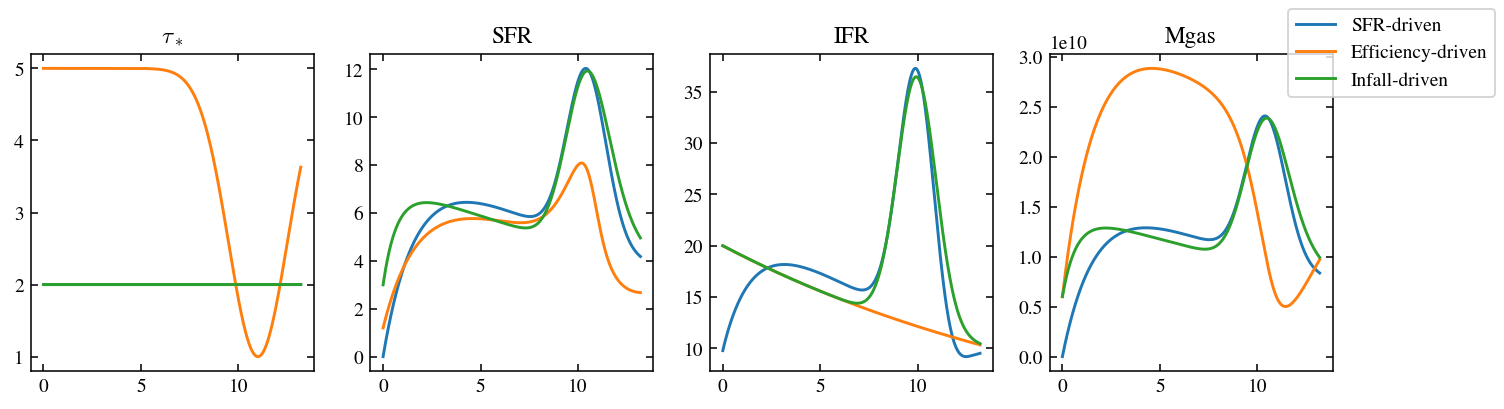

In [223]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
runs = ['lateburst/powerlaw', 'efficiencyburst/powerlaw', 'infallburst/powerlaw']
labels = ['SFR-driven', 'Efficiency-driven', 'Infall-driven']
for run, label in zip(runs, labels):
    hist = vice.history('outputs/' + run)
    axs[0].plot(simtime[1:], [hist['mgas'][i+1] / hist['sfr'][i+1] * 1e-9 for i in range(len(simtime)-1)])
    axs[1].plot(simtime, hist['sfr'], label=label)
    axs[2].plot(simtime, hist['ifr'])
    axs[3].plot(simtime, hist['mgas'])
axs[0].set_title(r'$\tau_*$')
axs[1].set_title('SFR')
axs[2].set_title('IFR')
axs[3].set_title('Mgas')
fig.legend()
plt.show()

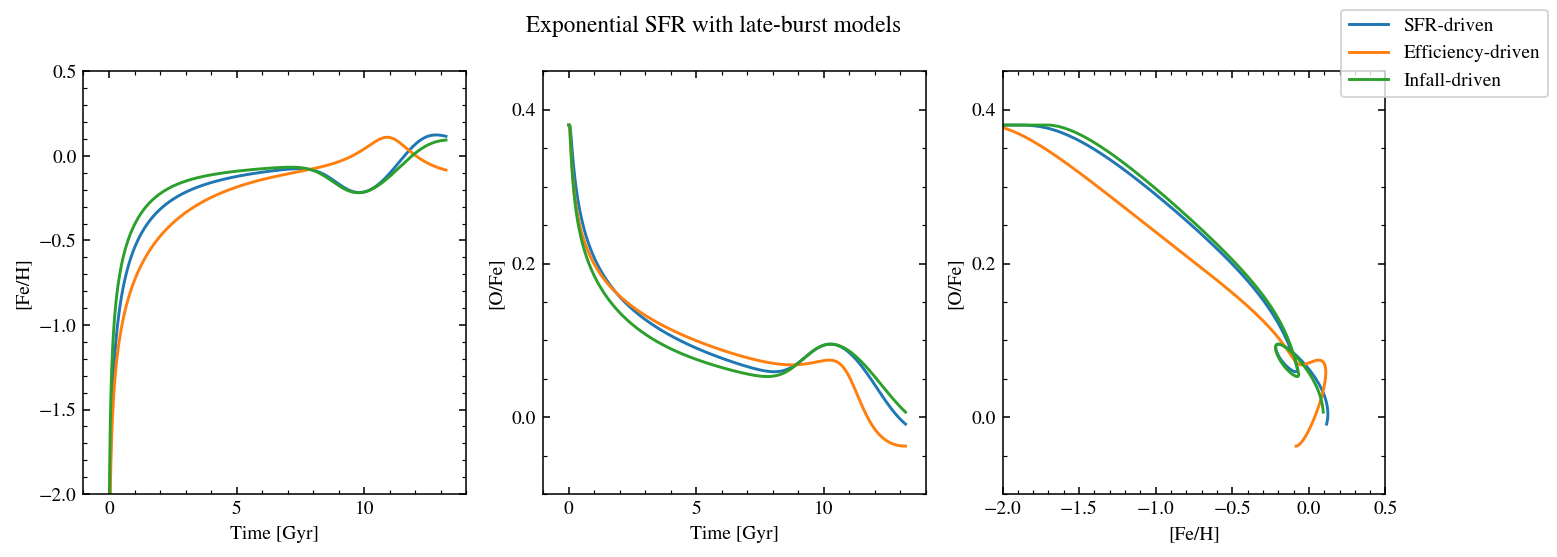

In [224]:
fig, axs = tri_plot(olim=(-0.1, 0.45))
runs = ['lateburst/powerlaw', 'efficiencyburst/powerlaw', 'infallburst/powerlaw']
labels = ['SFR-driven', 'Efficiency-driven', 'Infall-driven']
for run, label in zip(runs, labels):
    history = vice.history('outputs/' + run)
    axs[0].plot(history['time'], history['[fe/h]'], label=label)
    axs[1].plot(history['time'], history['[o/fe]'])
    axs[2].plot(history['[fe/h]'], history['[o/fe]'])
fig.legend()
fig.suptitle('Exponential SFR with late-burst models')
plt.show()

## Old stuff

In [33]:
# Power-law DTD with shorter 40 Myr delay time
sz = vice.singlezone(name='sz_short', elements=('o', 'fe'), RIa='plaw', delay=0.04)
sz.run(simtime)

/home/lodubay/anaconda3/lib/python3.9/site-packages/vice/core/singlezone/singlezone.py:1778: UserWarning: Specified output times denser are finer than the timestep size. This may affect when output is written. Consider rerunning this simulation with coarser output times.
  return self.__c_version.run(output_times, capture = capture,


In [34]:
# Exponential DTDs
# Medium timescale
sz = vice.singlezone(name='sz_exp', elements=('o', 'fe'), RIa='exp', tau_ia=1.5)
sz.run(simtime)
# Short timescale
sz = vice.singlezone(name='sz_sexp', elements=('o', 'fe'), RIa='exp', tau_ia=0.5)
sz.run(simtime)
# Long timescale
sz = vice.singlezone(name='sz_lexp', elements=('o', 'fe'), RIa='exp', tau_ia=5.5)
sz.run(simtime)

In [35]:
# Wide gaussian DTD
def gauss(t, sigma=1, center=1):
    return np.exp(-(t-center)**2/(2*sigma**2))

sz = vice.singlezone(name='sz_wgauss', elements=('o', 'fe'), RIa=lambda t: gauss(t, sigma=2, center=3))
sz.run(simtime)

In [36]:
# Narrow gaussian DTD
sz = vice.singlezone(name='sz_ngauss', elements=('o', 'fe'), RIa=lambda t: gauss(t, sigma=0.2, center=1))
sz.run(simtime)

In [37]:
# Bimodal DTD
def bimodal(t, tau_ia=0.09):
    if t < tau_ia:
        return 10**(1.4 - 50*(np.log10(t*1e9) - 7.7)**2)
    else:
        return 10**(-0.8 - 0.9*(np.log10(t*1e9) - 8.7)**2)
    
sz = vice.singlezone(name='sz_bi', elements=('o', 'fe'), RIa=bimodal, delay=0.04)
sz.run(simtime)

In [38]:
# Uniform DTD
def uniform(t, tmin=0, tmax=1):
    if t >= tmin and t < tmax:
        return 1
    else:
        return 0

sz = vice.singlezone(name='sz_uni', elements=('o', 'fe'), RIa=uniform)
sz.run(simtime)

Plot Fe vs time, alpha vs time, and alpha vs Fe.

In [39]:
sz = vice.singlezone(name='sz_long_sfe', elements=('o', 'fe'), tau_star=5)
sz.run(simtime)

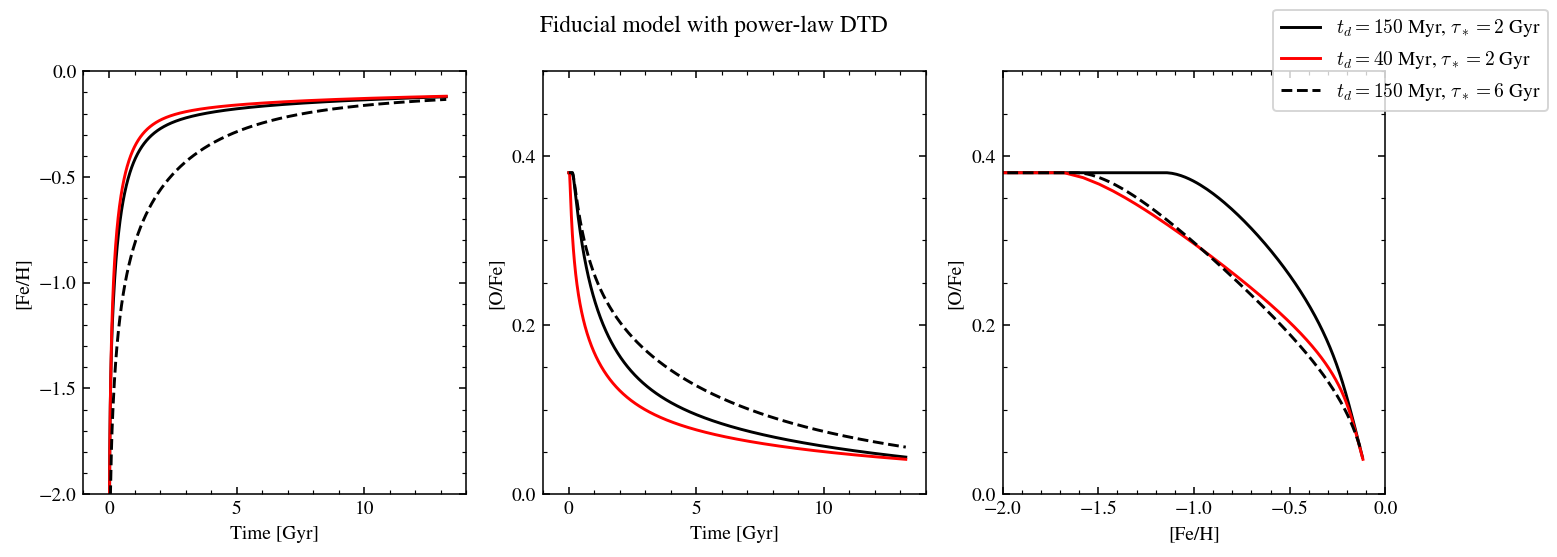

In [40]:
# Altering minimum delay time vs star formation efficiency timescale
fig, axs = tri_plot(felim=(-2, 0), olim=(0, 0.5))
                                         
# 150 Myr delay
sz = vice.singlezone(name='sz', elements=('o', 'fe'), RIa='plaw', delay=0.15, tau_star=2)
sz.run(simtime, overwrite=True)
history = vice.history('sz')
label = r'$t_d=150$ Myr, $\tau_*=2$ Gyr'
style = 'k'
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], style, label=label)
axs[1].plot(history['time'][1:], history['[o/fe]'][1:], style)
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:], style)

# 40 Myr delay
sz = vice.singlezone(name='sz', elements=('o', 'fe'), RIa='plaw', delay=0.04, tau_star=2)
sz.run(simtime, overwrite=True)
history = vice.history('sz')
label = r'$t_d=40$ Myr, $\tau_*=2$ Gyr'
style = 'r'
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], style, label=label)
axs[1].plot(history['time'][1:], history['[o/fe]'][1:], style)
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:], style)

# 150 Myr delay with 5 Gyr SFE timescale
sz = vice.singlezone(name='sz', elements=('o', 'fe'), RIa='plaw', delay=0.15, tau_star=6)
sz.run(simtime, overwrite=True)
history = vice.history('sz')
label = r'$t_d=150$ Myr, $\tau_*=6$ Gyr'
style = 'k--'
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], style, label=label)
axs[1].plot(history['time'][1:], history['[o/fe]'][1:], style)
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:], style)

fig.suptitle('Fiducial model with power-law DTD')
fig.legend()
plt.show()

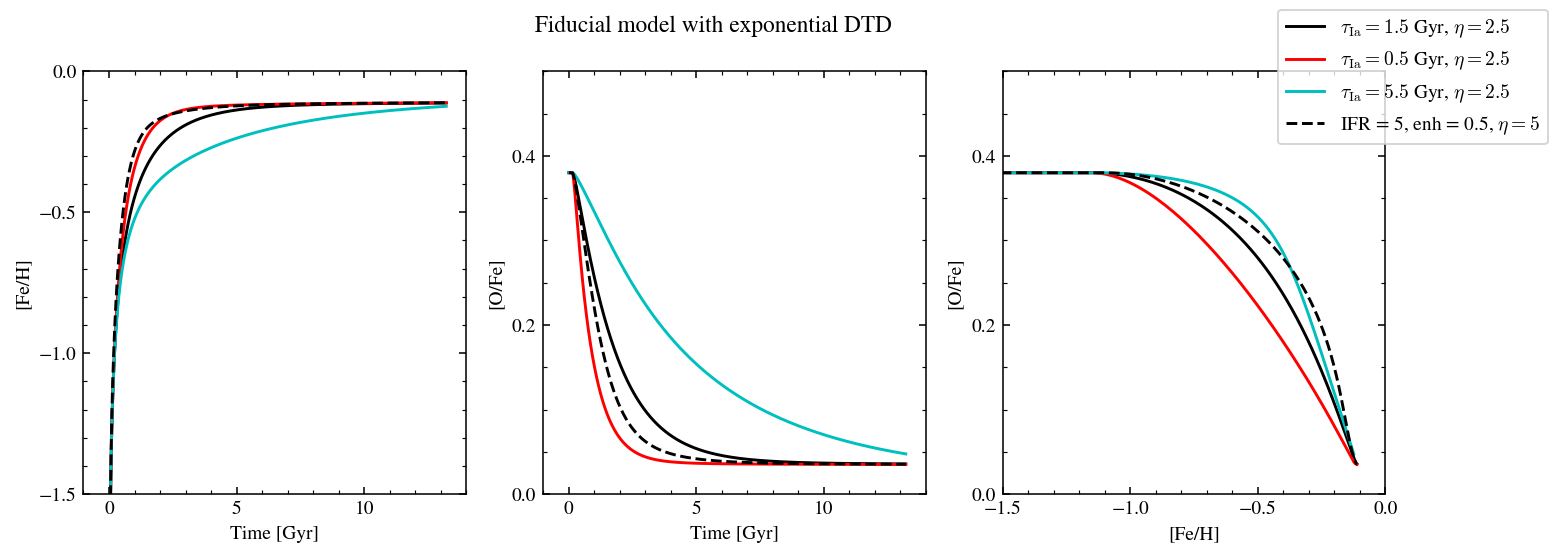

In [41]:
# Altering exponential Ia timescale vs star formation efficiency timescale
fig, axs = tri_plot(felim=(-1.5, 0), olim=(0, 0.5))
                                         
# Fiducial Ia timescale
sz = vice.singlezone(name='sz', elements=('o', 'fe'), RIa='exp', tau_ia=1.5, eta=2.5, enhancement=1)
sz.run(simtime, overwrite=True)
history = vice.history('sz')
label = r'$\tau_{\rm{Ia}}=1.5$ Gyr, $\eta=2.5$'
style = 'k'
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], style, label=label)
axs[1].plot(history['time'][1:], history['[o/fe]'][1:], style)
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:], style)

# Shorter Ia timescale
sz = vice.singlezone(name='sz', elements=('o', 'fe'), RIa='exp', tau_ia=0.5, eta=2.5, enhancement=1)
sz.run(simtime, overwrite=True)
history = vice.history('sz')
label = r'$\tau_{\rm{Ia}}=0.5$ Gyr, $\eta=2.5$'
style = 'r'
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], style, label=label)
axs[1].plot(history['time'][1:], history['[o/fe]'][1:], style)
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:], style)

# Longer Ia timescale
sz = vice.singlezone(name='sz', elements=('o', 'fe'), RIa='exp', tau_ia=5.5, eta=2.5, enhancement=1)
sz.run(simtime, overwrite=True)
history = vice.history('sz')
label = r'$\tau_{\rm{Ia}}=5.5$ Gyr, $\eta=2.5$'
style = 'c'
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], style, label=label)
axs[1].plot(history['time'][1:], history['[o/fe]'][1:], style)
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:], style)

# Other parameter changes
# need to set Mg0
sz = vice.singlezone(name='sz', elements=('o', 'fe'), RIa='exp', tau_ia=1.5, mode='ifr', func=lambda t: 5, enhancement=0.5, eta=5)
sz.run(simtime, overwrite=True)
history = vice.history('sz')
label = 'IFR = 5, enh = 0.5, $\eta=5$'
style = 'k--'
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], style, label=label)
axs[1].plot(history['time'][1:], history['[o/fe]'][1:], style)
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:], style)

fig.suptitle('Fiducial model with exponential DTD')
fig.legend()
plt.show()